# Empty-space based filtering

In [15]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from src.utilities.utilstf import *
from src.methods.method_empty_space import empty_space_denoising
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.utilities.utilstf import voss

In [16]:
# np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**11
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

In [17]:
SNRin = 20
noise = np.random.randn(N,)
# noise = voss(N)
# noise = noise-np.mean(noise)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [18]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
radius = 0.95
test_params = { 'fun':'Fest', 'correction':'rs', 'transform':'asin(sqrt(.))', 'rmin':0.65,'rmax':1.05}
output = empty_space_denoising(signal,
                            radi_seg=radius,
                            radi_expand=radius,
                            # adapt_thr=True,
                            test_params=test_params,
                            return_dic=True)

signal_output, mask = (output[key] for key in ('s_r','mask')) 
S_output, F_output = get_spectrogram(signal_output, window = g)

In [19]:
tmin = int(np.sqrt(Nfft))
tmax = N-tmin
print(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax))

26.643878276626907


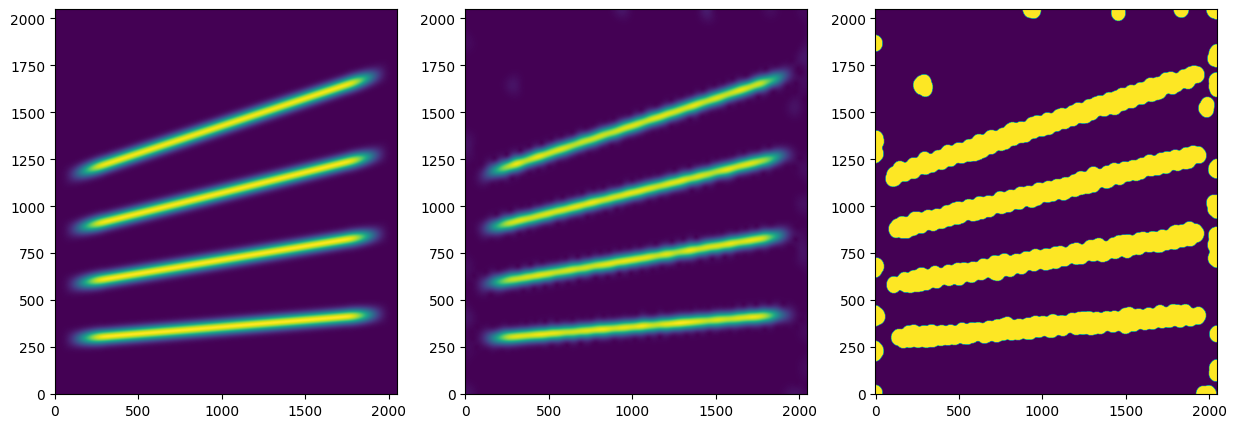

In [20]:
S, F = get_spectrogram(s, Nfft=Nfft)
F = F[0:Nfft//2+1]

S_output, F_output = get_spectrogram(signal_output, Nfft=Nfft)
F_output = F_output[0:Nfft//2+1]

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# [ax[0].plot(instf[np.where(instf>=0)]*Nfft,'r') for instf in signal.instf]
ax[1].imshow(abs(F_output), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(mask, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)

plt.show()

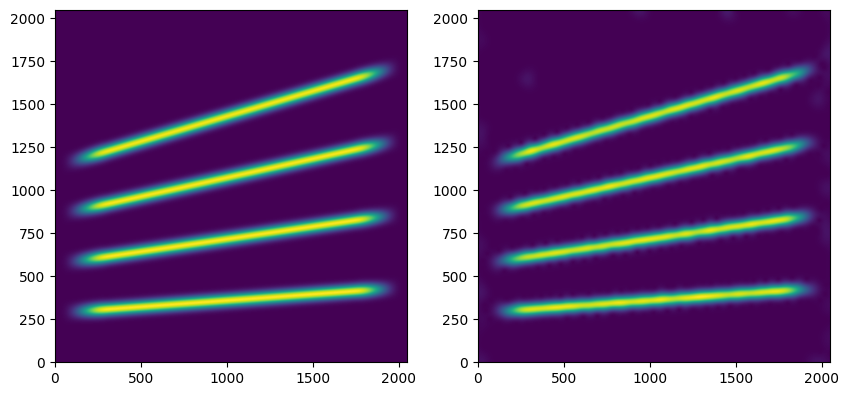

In [21]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F[0:N+1]), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output[0:N+1]), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()